**This Python file is executed in Lambda cloud.**

In [ ]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 9.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
path = 'df_merge.csv'

In [ ]:
df = pd.read_csv(path)

In the above step we are loading the merged data. The 40 Dataframes that we created while fetching the lyrics data from genius API and then did some feature engineering and sentiment analysis over it and created a single dataframe out of that. That was named as df_merge .

In [ ]:
df.shape

(100000, 15)

In [ ]:
df.isnull().sum()

track_pos                    0
track_artist_name            0
track_track_name             0
track_duration_ms            0
track_album_name             0
playlist_name                0
playlist_num_artists         0
playlist_num_albums          0
playlist_num_tracks          0
playlist_num_followers       0
playlist_num_edits           0
playlist_duration_ms         0
playlist_collaborative       0
bag_of_words              7757
sentiment_bag_of_words       0
dtype: int64

As observed that this df has 100000 rows and 15 columns. Now we can also see 7757 records are null which might be due to the song name has some emoji/different language character which were not found in  the genius api. So we would drop these records as they are just a small portion of the dataset.

In [ ]:
df.dropna(inplace=True)

In [ ]:
# df = df_merge.copy()

In [ ]:
df.head()

,track_pos,track_artist_name,track_track_name,track_duration_ms,track_album_name,playlist_name,playlist_num_artists,playlist_num_albums,playlist_num_tracks,playlist_num_followers,playlist_num_edits,playlist_duration_ms,playlist_collaborative,bag_of_words,sentiment_bag_of_words
0,0,The Jackson 5,ABC,174866,ABC,party party,116,142,152,1,3,39413578,False,jackson c easy love b baby michael sing come s...,0.7964
1,1,Streetlight Manifesto,Point/Counterpoint,327920,Everything Goes Numb,party party,116,142,152,1,3,39413578,False,know dont never would ill ive like wont cant im,0.1316
2,2,Michael Jackson,Billie Jean,293826,Thriller 25 Super Deluxe Edition,party party,116,142,152,1,3,39413578,False,jean one billie lover uh son baby kid hoo girl,0.5859
3,3,Green Day,Basket Case,181533,Dookie,party party,116,142,152,1,3,39413578,False,sometimes chorus give creeps mind plays tricks...,0.1280
4,4,The White Stripes,Seven Nation Army,231800,Elephant,party party,116,142,152,1,3,39413578,False,im na gon back comin prechorus instrumental bl...,0.0000


In [ ]:
# df.drop(columns=['track_pos'],inplace=True)

In [ ]:
df.shape

(92243, 15)

In [ ]:
df.head()

,track_pos,track_artist_name,track_track_name,track_duration_ms,track_album_name,playlist_name,playlist_num_artists,playlist_num_albums,playlist_num_tracks,playlist_num_followers,playlist_num_edits,playlist_duration_ms,playlist_collaborative,bag_of_words,sentiment_bag_of_words
0,0,The Jackson 5,ABC,174866,ABC,party party,116,142,152,1,3,39413578,False,jackson c easy love b baby michael sing come s...,0.7964
1,1,Streetlight Manifesto,Point/Counterpoint,327920,Everything Goes Numb,party party,116,142,152,1,3,39413578,False,know dont never would ill ive like wont cant im,0.1316
2,2,Michael Jackson,Billie Jean,293826,Thriller 25 Super Deluxe Edition,party party,116,142,152,1,3,39413578,False,jean one billie lover uh son baby kid hoo girl,0.5859
3,3,Green Day,Basket Case,181533,Dookie,party party,116,142,152,1,3,39413578,False,sometimes chorus give creeps mind plays tricks...,0.1280
4,4,The White Stripes,Seven Nation Army,231800,Elephant,party party,116,142,152,1,3,39413578,False,im na gon back comin prechorus instrumental bl...,0.0000


In [ ]:
# X.iloc[0:10].to_csv('X.csv')

In [ ]:
df[df.track_artist_name == 'The Notorious B.I.G.']

,track_pos,track_artist_name,track_track_name,track_duration_ms,track_album_name,playlist_name,playlist_num_artists,playlist_num_albums,playlist_num_tracks,playlist_num_followers,playlist_num_edits,playlist_duration_ms,playlist_collaborative,bag_of_words,sentiment_bag_of_words
32,32,The Notorious B.I.G.,Hypnotize - 2014 Remastered Version,229826,Life After Death (Remastered Edition),party party,116,142,152,1,3,39413578,False,feat remaster big notorious mo diddy remix mas...,-0.4404
33,33,The Notorious B.I.G.,Big Poppa,252746,Ready To Die The Remaster,party party,116,142,152,1,3,39413578,False,big uh call poppa puff daddy got love notoriou...,0.3182
34,34,The Notorious B.I.G.,Juicy,302693,Ready To Die The Remaster,party party,116,142,152,1,3,39413578,False,good know dont nigga cause notorious big let y...,0.7584
70,70,The Notorious B.I.G.,Ten Crack Commandments - 2014 Remastered Version,204026,Life After Death (Remastered Edition),party party,116,142,152,1,3,39413578,False,feat remaster big notorious mo diddy remix mas...,-0.4404
3782,18,The Notorious B.I.G.,Juicy,302693,Ready To Die The Remaster,goodies,13,25,33,3,7,8869279,False,good know dont nigga cause notorious big let y...,0.7584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91488,95,The Notorious B.I.G.,Juicy,302693,Ready To Die The Remaster,80's,117,127,134,1,35,34515983,False,good know dont nigga cause notorious big let y...,0.7584
91489,96,The Notorious B.I.G.,Big Poppa,252746,Ready To Die The Remaster,80's,117,127,134,1,35,34515983,False,big uh call poppa puff daddy got love notoriou...,0.3182
93641,76,The Notorious B.I.G.,One More Chance,283053,Ready To Die The Remaster,90's Hits,87,97,101,1,2,24966101,False,dick give shit know fuck big biggie got chance...,-0.8555
98731,7,The Notorious B.I.G.,Biggie (feat. Junior M.A.F.I.A.),322400,Born Again,Rap,55,82,98,1,71,23781624,True,feat remaster big notorious mo diddy remix mas...,-0.4404


In [ ]:
df.iloc[0]

track_pos                                                                 0
track_artist_name                                             The Jackson 5
track_track_name                                                        ABC
track_duration_ms                                                    174866
track_album_name                                                        ABC
playlist_name                                                   party party
playlist_num_artists                                                    116
playlist_num_albums                                                     142
playlist_num_tracks                                                     152
playlist_num_followers                                                    1
playlist_num_edits                                                        3
playlist_duration_ms                                               39413578
playlist_collaborative                                                False
bag_of_words

Above code shows a single record.

In [ ]:
df.head()

,track_pos,track_artist_name,track_track_name,track_duration_ms,track_album_name,playlist_name,playlist_num_artists,playlist_num_albums,playlist_num_tracks,playlist_num_followers,playlist_num_edits,playlist_duration_ms,playlist_collaborative,bag_of_words,sentiment_bag_of_words
0,0,The Jackson 5,ABC,174866,ABC,party party,116,142,152,1,3,39413578,False,jackson c easy love b baby michael sing come s...,0.7964
1,1,Streetlight Manifesto,Point/Counterpoint,327920,Everything Goes Numb,party party,116,142,152,1,3,39413578,False,know dont never would ill ive like wont cant im,0.1316
2,2,Michael Jackson,Billie Jean,293826,Thriller 25 Super Deluxe Edition,party party,116,142,152,1,3,39413578,False,jean one billie lover uh son baby kid hoo girl,0.5859
3,3,Green Day,Basket Case,181533,Dookie,party party,116,142,152,1,3,39413578,False,sometimes chorus give creeps mind plays tricks...,0.1280
4,4,The White Stripes,Seven Nation Army,231800,Elephant,party party,116,142,152,1,3,39413578,False,im na gon back comin prechorus instrumental bl...,0.0000


In [ ]:
pip install --upgrade tensorflow


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.7/231.7 MB 37.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 182.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 110.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 198.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 166.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 212.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 215.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Installing tensor flow library for running the RNN Model.

In [ ]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Mar_28_02:24:28_PDT_2024
Cuda compilation tools, release 12.4, V12.4.131
Build cuda_12.4.r12.4/compiler.34097967_0


NVCC version to see compatability on lambda cloud, as executing the model on lambda cloud, so if updated version is not there we need to install it.

In [ ]:
# Import necessary libraries for RNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Assuming `df` is already prepared as per the notebook
# Step 1: Prepare Sequential Data for RNN
df = df.sort_values(by=['playlist_name', 'track_pos'])
track_to_id = {uri: idx for idx, uri in enumerate(df['track_track_name'].unique())}
df['track_id'] = df['track_track_name'].map(track_to_id)
playlist_sequences = df.groupby('playlist_name')['track_id'].apply(list)

input_sequences = []
labels = []

for seq in playlist_sequences:
    for i in range(1, len(seq)):
        input_sequences.append(seq[:i])
        labels.append(seq[i])

from tensorflow.keras.preprocessing.sequence import pad_sequences
max_sequence_length = max(len(seq) for seq in input_sequences)
X = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')
y = tf.keras.utils.to_categorical(labels, num_classes=len(track_to_id))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In the above code we are creating sequencing data like this:

for example if sequence : Input sequences: [0], [0,1], [3], [5,6]
                          Labelled Output: [1,2,4,7]

Padded Input:

[0 0 0
 0 0 1
 0 0 3
 0 5 6]

One hot encoded Labels:

[0, 1, 0, 0, 0, 0, 0, 0
0, 0, 1, 0, 0, 0, 0, 0
0, 0, 0, 0, 1, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 1]

These steps are required so that the length of the sequence is made consistent throughout the batch processing and also the embedding layer can better understand the data.







In the above code we are creating sequencing data like:



In [ ]:
y_train.shape

(72830, 35412)

In [ ]:

# Step 2: Build RNN Model
model = Sequential([
    Embedding(input_dim=len(track_to_id), output_dim=64, input_length=max_sequence_length),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(len(track_to_id), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Building the RNN model with 64 dimension and 128 LSTM Memory units.

In [ ]:

# Step 3: Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))



Epoch 1/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 975s 856ms/step - accuracy: 8.5026e-04 - loss: 10.2492 - val_accuracy: 0.0010 - val_loss: 9.9802
Epoch 2/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 974s 856ms/step - accuracy: 8.6570e-04 - loss: 9.6332 - val_accuracy: 0.0013 - val_loss: 10.0590
Epoch 3/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 973s 855ms/step - accuracy: 0.0017 - loss: 9.2898 - val_accuracy: 0.0020 - val_loss: 10.2161
Epoch 4/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 973s 855ms/step - accuracy: 0.0033 - loss: 8.7725 - val_accuracy: 0.0020 - val_loss: 10.4592
Epoch 5/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 974s 856ms/step - accuracy: 0.0069 - loss: 8.1256 - val_accuracy: 0.0022 - val_loss: 10.7951
Epoch 6/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 975s 857ms/step - accuracy: 0.0190 - loss: 7.4166 - val_accuracy: 0.0031 - val_loss: 11.1338
Epoch 7/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 974s 856ms/step - accuracy: 0.0535 - loss: 6.6906 - val_accuracy: 0.0036 - val_loss: 11.3678
Epoch 8/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 975s 

10 Epochs are used to train the model.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 979s 859ms/step - accuracy: 8.5230e-04 - loss: 10.2593 - val_accuracy: 0.0016 - val_loss: 10.0109
Epoch 2/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 976s 858ms/step - accuracy: 0.0012 - loss: 9.6535 - val_accuracy: 0.0015 - val_loss: 10.0852
Epoch 3/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 976s 858ms/step - accuracy: 0.0015 - loss: 9.3141 - val_accuracy: 0.0016 - val_loss: 10.2305
Epoch 4/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 976s 858ms/step - accuracy: 0.0030 - loss: 8.8061 - val_accuracy: 0.0021 - val_loss: 10.5149
Epoch 5/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 976s 858ms/step - accuracy: 0.0069 - loss: 8.1602 - val_accuracy: 0.0020 - val_loss: 10.8747
Epoch 6/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 977s 858ms/step - accuracy: 0.0194 - loss: 7.4587 - val_accuracy: 0.0018 - val_loss: 11.2370
Epoch 7/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 977s 858ms/step - accuracy: 0.0540 - loss: 6.7095 - val_accuracy: 0.0029 - val_loss: 11.5664
Epoch 8/10
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 977s 858

The accuracy for this model is based on the label in the sequencing data which is okay to be very low as that is based on the labels provided to the sequencing data as described in step 1. However in our recommendationm model we aim the next track predicted to be related to the sequence of tracks, so accuracy for this model as well could be calculated using A/B Testing as mentioned during presentation.

In [ ]:
# Step 4: Evaluate and Predict
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

example_sequence = X_test[0].reshape(1, -1)
predicted_track = model.predict(example_sequence)
predicted_track_id = predicted_track.argmax(axis=1)[0]
predicted_track_uri = {v: k for k, v in track_to_id.items()}[predicted_track_id]
print(f"Predicted next track URI: {predicted_track_uri}")


569/569 ━━━━━━━━━━━━━━━━━━━━ 145s 255ms/step - accuracy: 0.0039 - loss: 12.2648
Test Loss: 12.199325561523438, Test Accuracy: 0.004393673036247492
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Predicted next track URI: Sail


In [ ]:
example_sequence

array([[  0,   0,   0, ..., 796, 797, 786]], dtype=int32)

In [ ]:
# Assuming 'model' is your trained RNN model

# # 1. Save in TensorFlow SavedModel format
# model.save("rnn_model_saved")

# 2. Save in HDF5 format
model.save("rnn_model_Final.h5")

print("Model exported successfully!")


Model exported successfully!


In [ ]:
# import tensorflow as tf
# tf.keras.backend.clear_session()

In [ ]:
# from tensorflow.keras.models import load_model

# # Load the saved model
# model = load_model("rnn_model.h5")

In [ ]:
# # Compile the model if needed
# model.compile(
#     optimizer='adam',
#     loss='categorical_crossentropy',  # Use the same loss function as training
#     metrics=['accuracy']  # Or any other metrics used during training
# )

In [ ]:
# history = model

In [ ]:
# # Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=64)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

285/285 ━━━━━━━━━━━━━━━━━━━━ 85s 298ms/step - accuracy: 0.0039 - loss: 12.2636
Test Loss: 12.199333190917969
Test Accuracy: 0.004393673036247492


In [ ]:
# # Generate predictions
# y_pred = model.predict(X_test)

# # Convert predictions from probabilities to class indices (if applicable)
# y_pred_classes = y_pred.argmax(axis=1)  # Predicted classes
# y_test_classes = y_test.argmax(axis=1)  # True classes (if one-hot encoded)

# print(y_pred_classes[:10])  # Example: first 10 predicted classes
# print(y_test_classes[:10])  # Example: first 10 true classes

569/569 ━━━━━━━━━━━━━━━━━━━━ 145s 254ms/step
[4790 1345 7669 3884 1499 5108 3868  562   17 7854]
[ 3875  8549  9845 29397 16445  4635 23114   563  3530  4137]


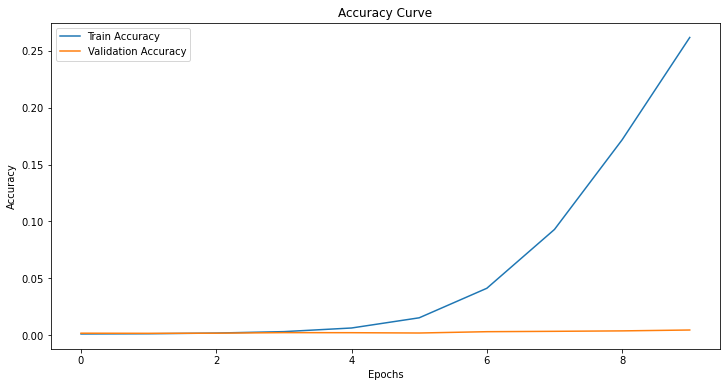

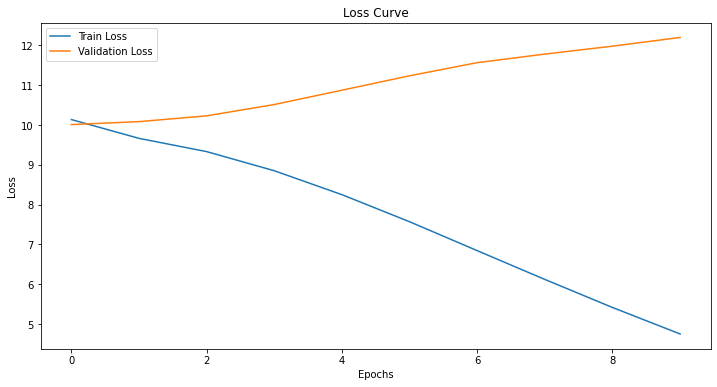

In [ ]:
# Assuming 'history' is the output from model.fit()
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()


Based on Train and Validation accuracy above line plots were plotted:
The first chart shows the Loss Curve, which depicts the training loss and validation loss over the course of 8 epochs. The training loss (blue line) starts at a higher value and decreases as the model trains, while the validation loss (orange line) follows a similar but slightly higher trajectory.
The second chart shows the Accuracy Curve, which displays the training accuracy and validation accuracy over the same 8 epochs. Both the training accuracy (blue line) and validation accuracy (orange line) start low and steadily increase as the model trains, with the validation accuracy slightly lower than the training accuracy.
These charts are commonly used in machine learning to monitor the performance of a model during the training and validation process. They provide insights into how well the model is learning and whether it is overfitting or underfitting the data.

However, as mentioned above accuracy calculated here is based on the sequencing data, but improving that accuracy will eventually benefit the performance of model. Therefore, we worked on improving it.

In [ ]:
list1 = ["Hypnotize - 2014 Remastered Version", "Big Poppa"]

In [ ]:
# Code to evaluate the RNN model and predict the next track

# Step 1: Define a helper function to convert track names to their IDs
def track_names_to_ids(track_names, track_to_id):
    """
    Converts a sequence of track names to track IDs using the `track_to_id` mapping.
    """
    track_ids = [track_to_id.get(name, -1) for name in track_names]
    if -1 in track_ids:
        raise ValueError("One or more track names are not present in the `track_to_id` mapping.")
    return track_ids

# Step 2: Define a function to pad the input sequence
def prepare_input_sequence(track_ids, max_sequence_length):
    """
    Pads the sequence of track IDs to match the `max_sequence_length` expected by the model.
    """
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    return pad_sequences([track_ids], maxlen=max_sequence_length, padding='pre')

# Step 3: Define a function to map the predicted track ID back to the track URI
def get_track_uri_from_id(track_id, id_to_track):
    """
    Maps the predicted track ID to its track URI using the `id_to_track` mapping.
    """
    return id_to_track.get(track_id, "Unknown Track URI")

# Step 4: Predict the next track for a given sequence of track names
def predict_next_track(model, track_names, track_to_id, id_to_track, max_sequence_length):
    """
    Predicts the next track for a given sequence of track names.
    """
    # Convert track names to IDs
    track_ids = track_names_to_ids(track_names, track_to_id)

    # Prepare the input sequence
    input_sequence = prepare_input_sequence(track_ids, max_sequence_length)

    # Predict the next track
    predicted_probs = model.predict(input_sequence)
    predicted_track_id = predicted_probs.argmax(axis=1)[0]

    # Map the predicted track ID back to the track URI
    predicted_track_uri = get_track_uri_from_id(predicted_track_id, id_to_track)

    return predicted_track_uri

# Step 5: Example usage
# Assuming `model`, `track_to_id`, `id_to_track`, and `max_sequence_length` are already defined
id_to_track = {v: k for k, v in track_to_id.items()}  # Reverse mapping for track IDs to URIs
example_track_names = list1  # Replace with actual track names

try:
    predicted_track_uri = predict_next_track(
        model=model,
        track_names=example_track_names,
        track_to_id=track_to_id,
        id_to_track=id_to_track,
        max_sequence_length=max_sequence_length
    )
    print(f"Predicted next track URI: {predicted_track_uri}")
except ValueError as e:
    print(f"Error: {e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
Predicted next track URI: Wild Thoughts


In [ ]:
# row_sums = y_train.sum(axis=1)
# print("Row Sums:", row_sums)
# print("All Rows Sum to 1:", np.all(row_sums == 1))


Row Sums: [1. 1. 1. ... 1. 1. 1.]
All Rows Sum to 1: True


Below mentioned is the changes in the code to implement slow learning rate to improve the performance of the model.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout

model = Sequential([
    Embedding(input_dim=len(track_to_id), output_dim=50, input_length=max_sequence_length),
    LSTM(128, return_sequences=True),
    Dropout(0.3),  # Dropout layer to reduce overfitting
    LSTM(128),
    Dropout(0.3),
    Dense(len(track_to_id), activation='softmax')  # Output layer for probabilities
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Reduce learning rate when a metric has stopped improving
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64, callbacks=[lr_scheduler])


Epoch 1/5
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 1963s 2s/step - accuracy: 8.3495e-04 - loss: 10.2911 - val_accuracy: 5.4921e-04 - val_loss: 10.0896 - learning_rate: 0.0010
Epoch 2/5
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 1964s 2s/step - accuracy: 0.0010 - loss: 9.7432 - val_accuracy: 0.0015 - val_loss: 10.2078 - learning_rate: 0.0010
Epoch 3/5
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 1964s 2s/step - accuracy: 0.0015 - loss: 9.5917 - val_accuracy: 0.0011 - val_loss: 10.3960 - learning_rate: 0.0010
Epoch 4/5
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 1967s 2s/step - accuracy: 0.0012 - loss: 9.4059 - val_accuracy: 0.0013 - val_loss: 10.5298 - learning_rate: 5.0000e-04
Epoch 5/5
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 1964s 2s/step - accuracy: 0.0013 - loss: 9.2661 - val_accuracy: 0.0014 - val_loss: 10.7365 - learning_rate: 5.0000e-04


In [ ]:
history = model

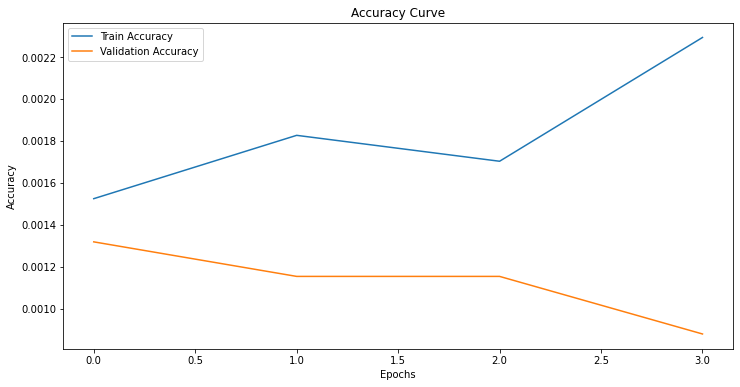

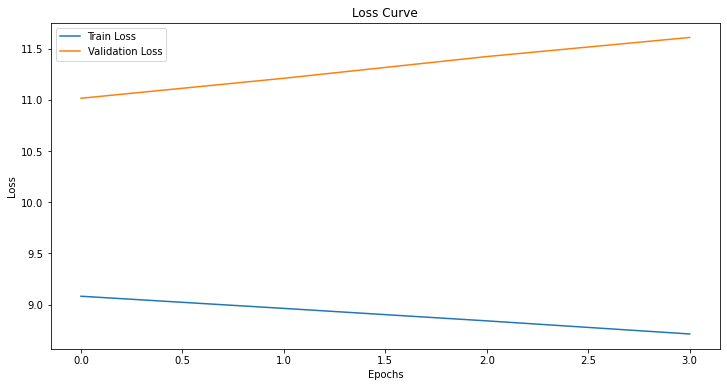

In [ ]:
# Assuming 'history' is the output from model.fit()
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()


As observed in above graphs, there is no significant improvement observedafter implementing slow learning rate. Trying Early stopping approach in the below code for performance improvement.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Stop training when validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=14, batch_size=64, callbacks=[early_stopping])


Epoch 1/14
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 1975s 2s/step - accuracy: 0.0014 - loss: 9.0685 - val_accuracy: 0.0013 - val_loss: 11.0148
Epoch 2/14
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 1970s 2s/step - accuracy: 0.0019 - loss: 8.9552 - val_accuracy: 0.0012 - val_loss: 11.2100
Epoch 3/14
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 1970s 2s/step - accuracy: 0.0019 - loss: 8.8312 - val_accuracy: 0.0012 - val_loss: 11.4220
Epoch 4/14
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 1969s 2s/step - accuracy: 0.0025 - loss: 8.6968 - val_accuracy: 8.7873e-04 - val_loss: 11.6084


**Conclusion:**

As observed above, the performance of model is almost the same even after implementing different methodologies, which means based on sequencing data and the number of epochs the model built with 10 epochs is showing similar performance as others. Thus, due to resource constraints this model is not a great model for the given problem statement. However, for certain scenarios where KNN Model is not giving suitable output like 'if all songs in the playlist are given as input' then for such scenarios this model could be useful to predict the output.
